In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = pd.read_csv(r'uber data.csv')
testdata = pd.read_csv(r'test.csv')

In [3]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [5]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.342877,-72.506121,39.922326,-72.518673,39.925579,1.682445
std,9.837855,11.608097,10.048947,10.724226,6.751120,1.306730
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992050,40.735007,-73.991295,40.734092,1.000000
50%,8.500000,-73.981743,40.752761,-73.980072,40.753225,1.000000
75%,12.500000,-73.967068,40.767127,-73.963508,40.768070,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [6]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [7]:
data['date'] = data['pickup_datetime'].apply(lambda d: d.day)
data['month'] = data['pickup_datetime'].apply(lambda d: d.month)
data['year'] = data['pickup_datetime'].apply(lambda d: d.year)
data['day'] = data['pickup_datetime'].apply(lambda d: d.weekday)
data['hour'] = data['pickup_datetime'].apply(lambda d: d.hour)

In [8]:
data.drop(['key','pickup_datetime'], axis=1, inplace=True)

In [9]:
data.dropna(how='any',inplace=True)

In [10]:
min_lat = -90
max_lat = 90
min_long = -180
max_long = 180

In [11]:
data.drop(data[(data['pickup_longitude'] < min_long) | (data['pickup_longitude'] > max_long)].index, inplace=True)
data.drop(data[(data['dropoff_longitude'] < min_long) | (data['dropoff_longitude'] > max_long)].index, inplace=True)
data.drop(data[(data['pickup_latitude'] < min_lat) | (data['pickup_latitude'] > max_lat)].index, inplace=True)
data.drop(data[(data['dropoff_latitude'] < min_lat) | (data['dropoff_latitude'] > max_lat)].index, inplace=True)

D:\Preeti\DS_Tools\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Preeti\DS_Tools\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Preeti\DS_Tools\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hi

<AxesSubplot:xlabel='dropoff_latitude', ylabel='Density'>

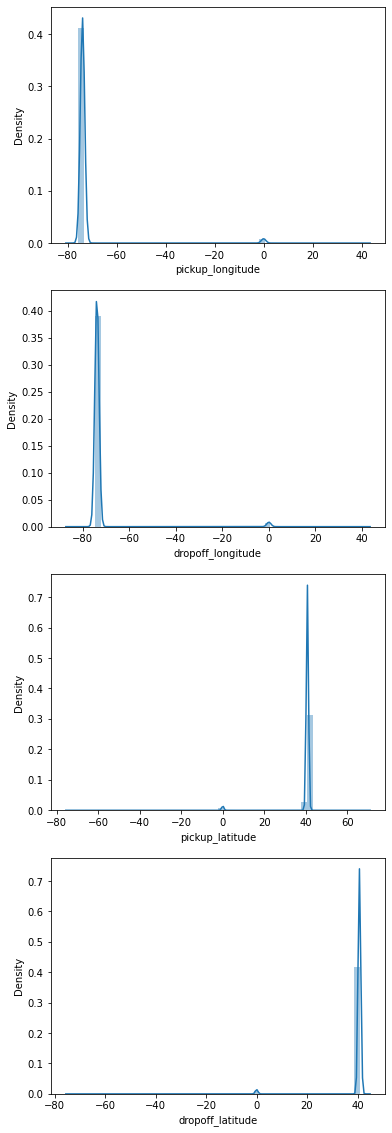

In [12]:
fig, axs = plt.subplots(4, figsize=(6,20))
sns.distplot(data['pickup_longitude'], ax=axs[0])
sns.distplot(data['dropoff_longitude'], ax=axs[1])
sns.distplot(data['pickup_latitude'], ax=axs[2])
sns.distplot(data['dropoff_latitude'], ax=axs[3])

In [13]:
data.drop(data[data['fare_amount']<=0].index,inplace=True)
data.drop(data[data['passenger_count']==0].index,inplace=True)

In [14]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,day,hour
count,199262.000000,199262.000000,199262.000000,199262.000000,199262.000000,199262.000000,199262.000000,199262.000000,199262.000000,199262.000000,199262.000000
mean,11.352172,-72.513289,39.927400,-72.511466,39.927302,1.688470,15.684059,6.274362,2011.741652,3.039079,13.518272
std,9.846891,10.397264,6.060304,10.400200,6.060996,1.305167,8.673776,3.443486,1.865087,1.949623,6.506546
min,0.010000,-78.083332,-74.007670,-84.654241,-74.035197,1.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992049,40.735001,-73.991293,40.734092,1.000000,8.000000,3.000000,2010.000000,1.000000,9.000000
50%,8.500000,-73.981741,40.752761,-73.980069,40.753228,1.000000,16.000000,6.000000,2012.000000,3.000000,14.000000
75%,12.500000,-73.967065,40.767126,-73.963510,40.768070,2.000000,23.000000,9.000000,2013.000000,5.000000,19.000000
max,500.000000,40.811147,69.400000,40.851027,43.415190,6.000000,31.000000,12.000000,2015.000000,6.000000,23.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199262 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199262 non-null  float64
 1   pickup_longitude   199262 non-null  float64
 2   pickup_latitude    199262 non-null  float64
 3   dropoff_longitude  199262 non-null  float64
 4   dropoff_latitude   199262 non-null  float64
 5   passenger_count    199262 non-null  int64  
 6   date               199262 non-null  int64  
 7   month              199262 non-null  int64  
 8   year               199262 non-null  int64  
 9   day                199262 non-null  int64  
 10  hour               199262 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 18.2 MB


<AxesSubplot:>

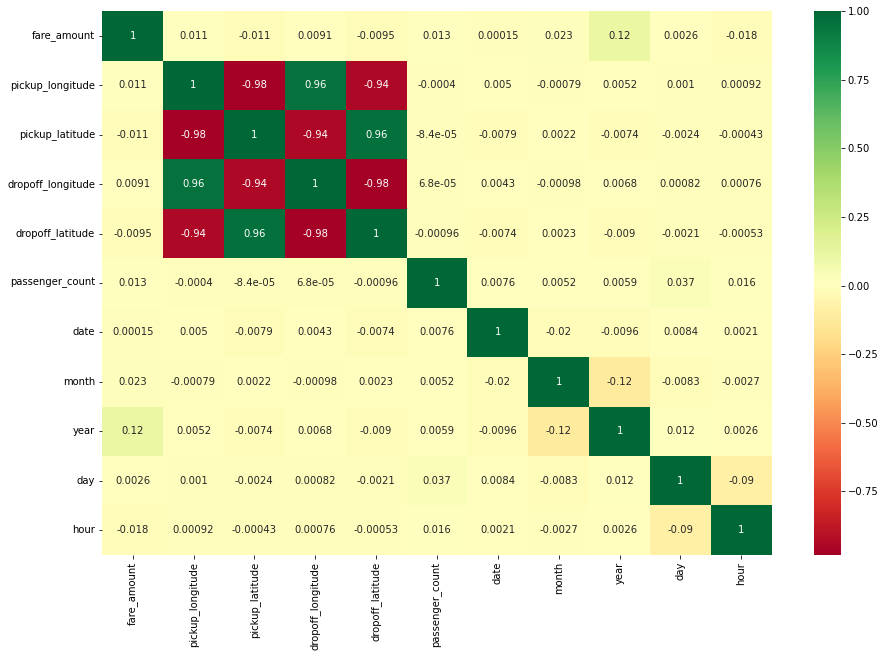

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True,cmap='RdYlGn')

In [17]:
x = data.drop('fare_amount',axis=1)
y = data['fare_amount']

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199262 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_longitude   199262 non-null  float64
 1   pickup_latitude    199262 non-null  float64
 2   dropoff_longitude  199262 non-null  float64
 3   dropoff_latitude   199262 non-null  float64
 4   passenger_count    199262 non-null  int64  
 5   date               199262 non-null  int64  
 6   month              199262 non-null  int64  
 7   year               199262 non-null  int64  
 8   day                199262 non-null  int64  
 9   hour               199262 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 16.7 MB


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)

In [20]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False)

In [21]:
regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [22]:
regressor.score(x_train,y_train)

0.9687146763609475

In [23]:
predict = regressor.predict(x_test)

In [24]:
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
print("RMSE is: ", np.sqrt(mean_squared_error(y_test,predict)))

RMSE is:  5.220873115211733


In [26]:
import pickle

filename = "Uberfile"
outfile = open(filename, "wb")
pickle.dump(regressor, outfile)
outfile.close()

In [27]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,day,hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,1,7
